In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def eq_log(y:float, r:float= 0.5, K:int =10):
    '''f(t,y) a ser utilizada nos metodos de range kutta'''
    return   r* y* (1-(y / K))

In [3]:
def metodo_de_euler(func,intervalo: list, h:float, y0:int, r:float= 0.5, K:int =10)->pd.DataFrame:
    '''Dado um intervalo contendo pontos espaçados uniformemente de h,
    calcula-se a aproximação numérica da equação logistica para cada ponto pelo metodo de euler'''
    
    # define um vetor de derivadas
    derivadas = []
    # adiciona y0 como o primeiro componente do vetor
    derivadas.append(y0)
    # define y_k com seu valor inicial
    y_k = y0
    
    # Vamos fazer um loop passando por todos os pontos do intervalo de acordo com o passo passado
    # ao ponto que calculamos a derivada em cada ponto
    for tempo in np.arange(intervalo[0], intervalo[1], h):
        # calcula a derivada no ponto utilizando a formula de euler(sem a dependencia do tempo).
        y_k = y_k + h*func(y_k,r=r,K=K)
        # adiciona a derivada no vetor de derivadas
        derivadas.append(y_k)

    # retorna um dataframe contendo o ponto e a sua derivada calculada
    return pd.DataFrame(derivadas, index= np.arange(intervalo[0],intervalo[1]+ h,h))

In [4]:
def solucao_analitica(intervalo:list, y:float,h:float, r:float= 0.5, K:int =10)->pd.DataFrame:
    '''a função a seguir devolve um Dataframe contendo a solução analitica da equação logistica
    em cada ponto de um dado intervalo espaçado de h'''
    # define o vetor de derivadas
    derivadas = []
    
    # Vamos fazer um loop passando por todos os pontos do intervalo, e calculando assim a derivada em cada ponto
    for tempo in np.arange(intervalo[0], intervalo[1] + h, h):
        # calcula o da derivada no ponto t pela função analitica dada no enunciado
        y_k = (y*K*np.exp(r*tempo)) / (K + y*(np.exp(r*tempo) - 1))
        # adiciona o novo y_k no vetor de derivadas
        derivadas.append(y_k)
    
    # retorna um dataframe contendo o ponto e a sua derivada calculada
    return pd.DataFrame(derivadas, np.arange(intervalo[0], intervalo[1] + h, h) )

In [5]:
def range_kutta_4(func,intervalo: list, h:float, y0:int, r:float= 0.5, K:int =10)->pd.DataFrame:
    '''Dado um intervalo contendo pontos espaçados uniformemente de h,
    calcula-se a aproximação numérica da equação logistica
    para cada ponto pelo metodo de de range-kutta de 4 ordem'''
    derivadas = []
    
    # adiciona ao vetor devivadas o valor de y0 e inicia y_k com este valor
    derivadas.append(y0)
    y_k = y0
    # Vamos fazer um loop passando por todos os pontos do intervalo, e calculando assim a derivada em cada ponto
    for i in np.arange(intervalo[0],intervalo[1],h):
        # definindo as constantes k1,k2,k3,k4 para o calculo da função iterativa
        k1 = func(y_k, r=r, K=K)
        k2 = func(y_k + k1 * h/2,r=r, K=K)
        k3 = func(y_k+ k2 * h/2,r=r, K=K)
        k4 = func(y_k + h*k3, r=r, K=K)
        # calculo do novo y_k
        y_k = y_k + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        # adiciona o novo y_k no vetor de derivadas
        derivadas.append(y_k)
    # retorna um dataframe contendo o ponto e a sua derivada calculada
    return pd.DataFrame(derivadas, index= np.arange(intervalo[0],intervalo[1]+ h,h))

### Questão A

In [6]:
# define valores para o  intervalo o alpha e o beta (de acordo com o enunciado) 𝑟 = 0.5, 𝐾 = 10, ℎ = 0.05 e
# 𝑦0 = 1
intervalo =[0, 4]
r = 0.5
K = 10
h = 0.05
y0 = 1

In [7]:
# cria um dataframe contendo a solução numérica usando o metodo de Euler
lista_pelo_metodo_de_euler = metodo_de_euler(eq_log,intervalo,h,y0,r,K)

In [8]:
# cria um dataframe contendo a solução numérica usando o metodo de RK4
lista_por_rk4 = range_kutta_4(eq_log,intervalo,h,y0,r,K)

In [9]:
# cria um dataframe contendo a solução analítica
lista_pela_solução = solucao_analitica(intervalo,y0,h,r,K)

##### As próximas 3 celulas juntam os 3 dataframes anteriores

In [10]:
tabela_final = pd.merge(lista_pela_solução,lista_pelo_metodo_de_euler,left_index=True,right_index=True)

In [11]:
tabela_final = pd.merge(tabela_final,lista_por_rk4,left_index=True,right_index=True)

In [12]:
tabela_final = tabela_final.rename(columns = {'0_x':'sol_analitica','0_y':'euler',0:'RK-4'})

In [13]:
# calcula o erro local real
tabela_final['Erro_Euler'] = abs(tabela_final.sol_analitica - tabela_final.euler)
tabela_final['Erro_RK4'] = abs(tabela_final.sol_analitica - tabela_final['RK-4'])

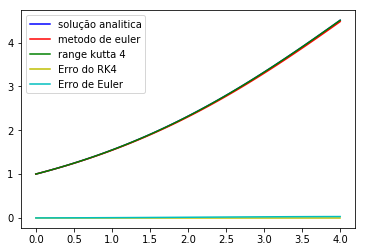

In [14]:
# plota os pontos calculados pelos metodos de RK4 e Euler e seus respectivos erros
plt.figure()
plt.plot(tabela_final.index,tabela_final.sol_analitica,'b-',label= 'solução analitica')
plt.plot(tabela_final.index,tabela_final.euler,'r-',label= 'metodo de euler')
plt.plot(tabela_final.index,tabela_final['RK-4'],'g-',label= 'range kutta 4')
plt.plot(tabela_final.index,tabela_final['Erro_RK4'],'y-',label= 'Erro do RK4')
plt.plot(tabela_final.index,tabela_final['Erro_Euler'],'c-',label= 'Erro de Euler')


plt.legend(loc='best')
plt.savefig('diferenca.png')
plt.show()